In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [6]:
X_train = X_train.reshape(-1, 784)

In [7]:
X_train = tf.cast(X_train, dtype=tf.float32)

In [8]:
X_train = X_train / 255

In [9]:
X_train.shape

TensorShape([48000, 784])

In [10]:
y_train = y_train.reshape(-1, 1)

In [11]:
y_train = tf.one_hot(y_train, depth=10)

In [12]:
y_train = tf.reshape(y_train, (-1, 10))

In [13]:
def preprocess(X, y):
    X = X.reshape(-1, 784)
    X = tf.cast(X, dtype=tf.float32)
    X = X / 255
    
    y = y.reshape(-1, 1)
    y = tf.one_hot(y, depth=10)
    y = tf.reshape(y, (-1, 10))
    return X, y

In [14]:
X_validation, y_validation = preprocess(X_validation, y_validation)

In [15]:
X_test, y_test = preprocess(X_test, y_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
model = Sequential([
    Dense(200, input_dim = 784, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=["acc"])

In [20]:
checkpoint_path = f"./check_point/mnist/tmp_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

In [21]:
model.fit(x = X_train,
          y = y_train,
          validation_data = (X_validation, y_validation),
          epochs = 30,
          batch_size = 100,
          callbacks=[checkpoint],
          verbose = 1
         )

Epoch 1/30
480/480 [==============================] - 2s 3ms/step - loss: 0.0193 - acc: 0.8617 - val_loss: 0.0068 - val_acc: 0.9554

Epoch 00001: val_loss improved from inf to 0.00677, saving model to ./check_point/mnist\tmp_checkpoint.ckpt
Epoch 2/30
480/480 [==============================] - 1s 3ms/step - loss: 0.0059 - acc: 0.9613 - val_loss: 0.0051 - val_acc: 0.9668

Epoch 00002: val_loss improved from 0.00677 to 0.00513, saving model to ./check_point/mnist\tmp_checkpoint.ckpt
Epoch 3/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0044 - acc: 0.9722 - val_loss: 0.0049 - val_acc: 0.9688

Epoch 00003: val_loss improved from 0.00513 to 0.00490, saving model to ./check_point/mnist\tmp_checkpoint.ckpt
Epoch 4/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0034 - acc: 0.9791 - val_loss: 0.0049 - val_acc: 0.9688

Epoch 00004: val_loss did not improve from 0.00490
Epoch 5/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0030 - ac

In [22]:
model.load_weights(checkpoint_path)

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0043 - acc: 0.9730


[0.004327941685914993, 0.9729999899864197]

In [24]:
images = X_test[0:10]

In [25]:
predict = model.predict(images)

In [27]:
predict01 = tf.argmax(predict, 1)

In [28]:
import matplotlib.pyplot as plt

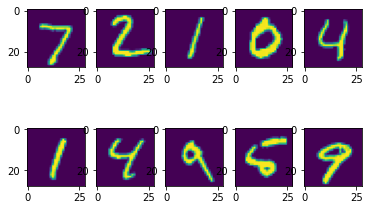

In [30]:
fig = plt.figure()

for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.imshow(tf.reshape(images[i], (28,28)))

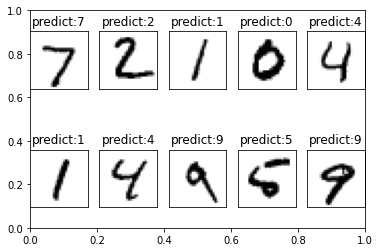

In [38]:
fig = plt.figure()
ax = plt.gca()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.imshow(tf.reshape(images[i], (28,28)), cmap=plt.cm.gray_r)
    subplot.set_xticks([])
    subplot.set_yticks([])
    ax.set_facecolor('w')
    subplot.set_title("predict:%d" % predict01[i])